# Evaluation of our final models (translation part) 

## Includes: 
- 4 Models: standard finetuning, only 3 Layers trained, only 6 Layers trained, Full model trained
- Grammar stats and Translation stats

1. Grammar stats of the untrained GPT2 model
    - we need to beat that atleast

2. Translation stats for the different translation models. 
    - 3 Translation datasets: Training data, testing data long, testing data short and testing data with no filters
    - The tree trained models are compared on a number of statistics based and on all 4 datasets
    - Grouped by models aswell as grouped by dataset (same values, but improves understanding) 
    
### Explanations: 
3. Grammar_stats:
    - Basically Error rates per Token, can be grouped in specific mistakes if needed
    
    
4. datasets:
    - Format: Sentence=Translation Sentence=Translation<|endoftext|>   
    - All datasets are split on EOS tokens. 
    - Sentences with no mistakes are excluded from the datasets (except the last) 
    - All datasets exclude sentences with over 100 mistakes ---> trash filter
    - Sentence pair --> Sentence=Translation
    - train: a sample of the training data (700 characters for one sentence pair max. This filter is active on the real training data aswell)
    - test_700: testing data with a max length of a 700 characters for one sentence pair
    - test_long: testing data with no max length
    - test_nf_lrong: testing data which includes correct sentences also and has no max length filter
    - test_nf_700: testing data which includes correct sentences also and with a max length of 700 characters per sentence pair
    

5. Translation stats:
    - Correct Trans: The generated text is equal to the correct translation
    - Trans included: The correct translation was included in the generated text (still additional words) 
    - Rep included: The generated text is included in the condition
    - Real in cond: The real translation is included in the condition 
    - Len Trans = Real: The length of the generated text is equal to the length of the correct translation
    - Length Trans: Length of the translation 
    - Length Real: Length of the correct translation
    - Average Levenstein Real/Trans: Average Levenshtein Distance between the generated text and the correct translation
    

### Observations:
- As soon as we include correct sentences the model does not perform. --> SOLVED. ITs much better now. Great
    - Going to doublecheck the dataset right now and investigate whats wrong
    - ! This is a big problem since the idea is to autocorrect the basic GPT. If we cant handle correct sentences this will not work!
- The number of layers is pretty much linear correlated with the performance of the model. 
    - While all models work, it seems like we need to full model after all for the maximum performance...
- Longer sentences are still working fine. 

In [8]:
# Set the GPU for training
import os
os.environ['CUDA_VISIBLE_DEVICES']='0'

In [9]:
import torch
import pickle
from transformers import GPT2Tokenizer, GPT2LMHeadModel, modeling_utils, GPT2Config, modeling_gpt2, GPT2Model, GPT2PreTrainedModel, GPT2Config
import copy
import operator
import json
import numpy as np
import pandas as pd
import language_check
from functools import reduce
import difflib
import matplotlib.pyplot as plt
from os import listdir
from os.path import isfile, join

from utility import *

In [10]:
titles = ["Number of wrong sentences", "Number of Mistakes", "Number of tokens",
          "Errors per Token","Error per sentence","trashFilter"]

### Calculate TrModels

In [11]:
data = load_datasets()
trans = load_data()

In [ ]:
%%capture
correct_data(trans)

### Calculate Base

In [3]:
%%capture
correct_base()

### Calculate classic finetune

In [4]:
data2 = load_and_split_finetune()

In [28]:
%%capture
correct_model_dataset(data2,"classic_finetuning")

In [31]:
def load_finetune():
    out = []
    stats = pickle.load(open("saves/classic_finetuning_translation_stats.p","rb"))
    cor = pickle.load(open("saves/classic_finetuning_translation.p","rb"))
    for x in range (len(stats)):
        out.append(grammar_stats(stats[x],len(cor)+ stats[x][-1]))
    return out

In [32]:
load_finetune()

[[2299, 6995, 125232, 0.05585633065031302, 3497.5, 0],
 [12517, 41030, 684968, 0.059900608495579356, 20515.0, 0]]

# Vanilla GPT2 error rate (thats the baseline) 

In [5]:
out  = load_base()

In [6]:
out

[3037, 9509, 164172, 0.05792096094340082, 1.9018, 1]

In [6]:
pd.DataFrame(out,index=titles,columns =["GPT2 base"])

,GPT2 base
Number of wrong sentences,3037.000000
Number of Mistakes,9509.000000
Number of tokens,164172.000000
Errors per Token,0.057921
Error per sentence,1.901800
trashFilter,1.000000


# Translation Model error rate comparison

In [7]:
out = load_grammar()

TypeError: unsupported operand type(s) for /: 'int' and 'list'

In [9]:
pd.DataFrame(out,columns=titles)  # insert whatever

,Number of wrong sentences,Number of Mistakes,Number of tokens,Errors per Token,Error per sentence
0,774,1913,32961,0.058038,1.913
1,755,1405,32867,0.042748,1.405
2,748,1854,34746,0.053359,1.854
3,739,2029,35265,0.057536,2.029


# Model based grouping:

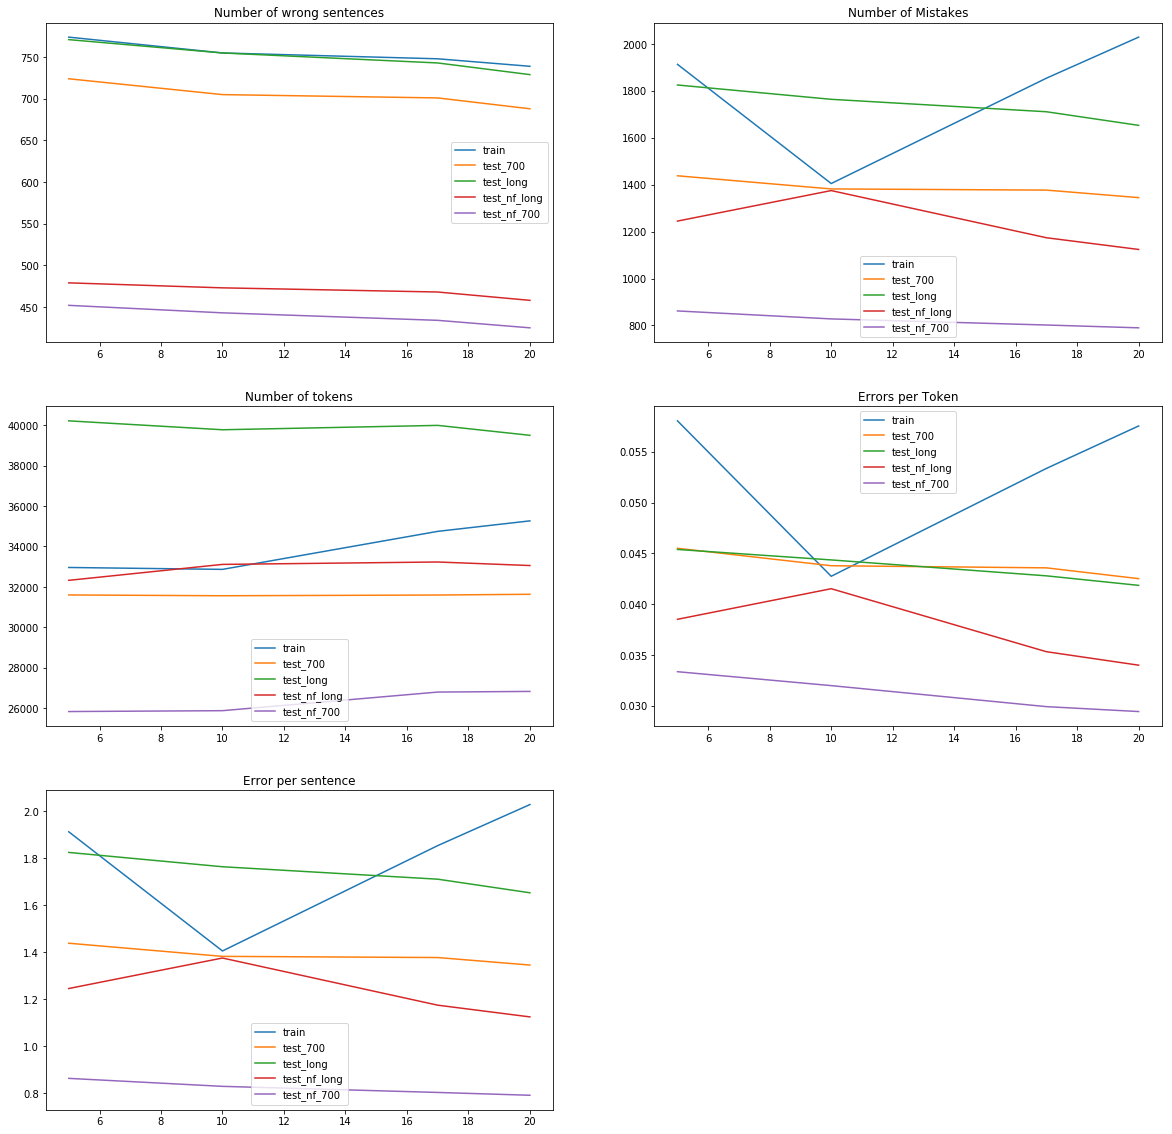

In [5]:
format_reloads_model_2(out,"3")

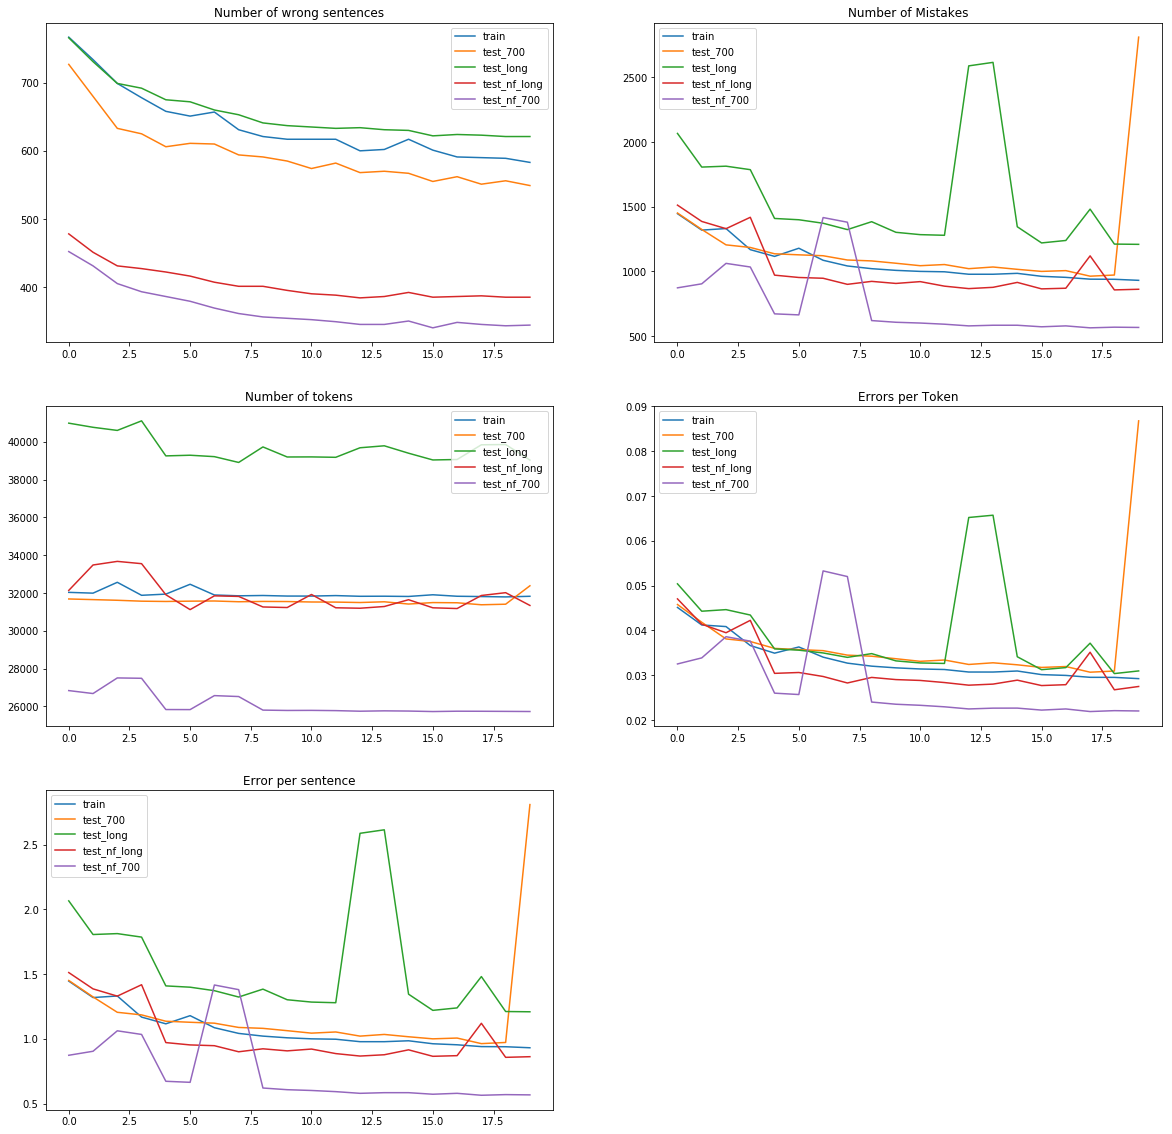

In [6]:
format_reloads_model_2(out,"6")

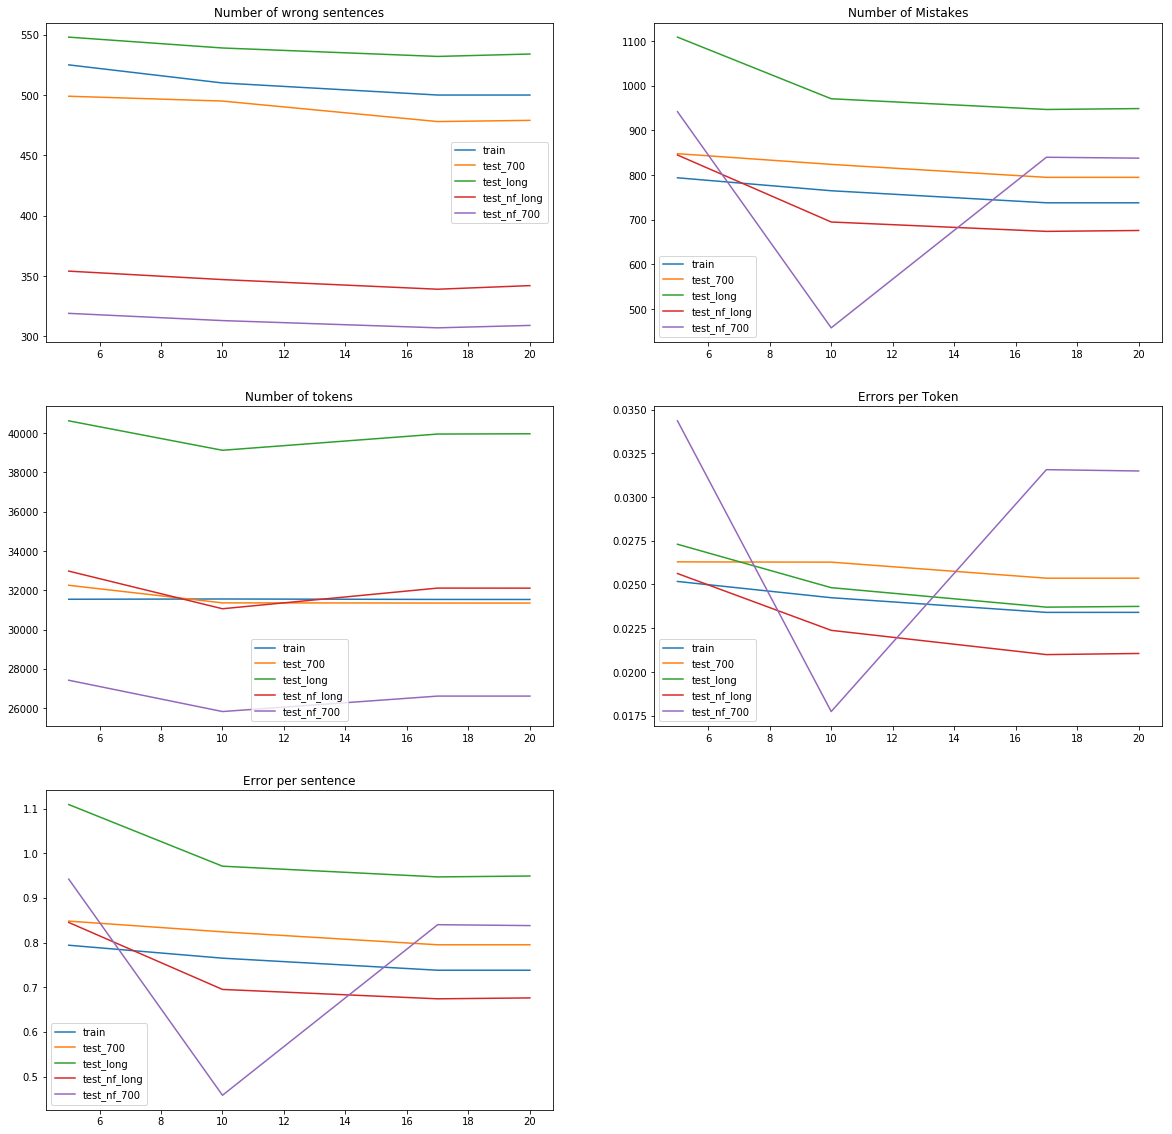

In [7]:
format_reloads_model_2(out,"full")

# Dataset based

    - ids --> ['train','test_all_wrong_700','test_all_wrong_long','test_no_filter_long','test_no_filter_700'] --> 0,1,2,3,4

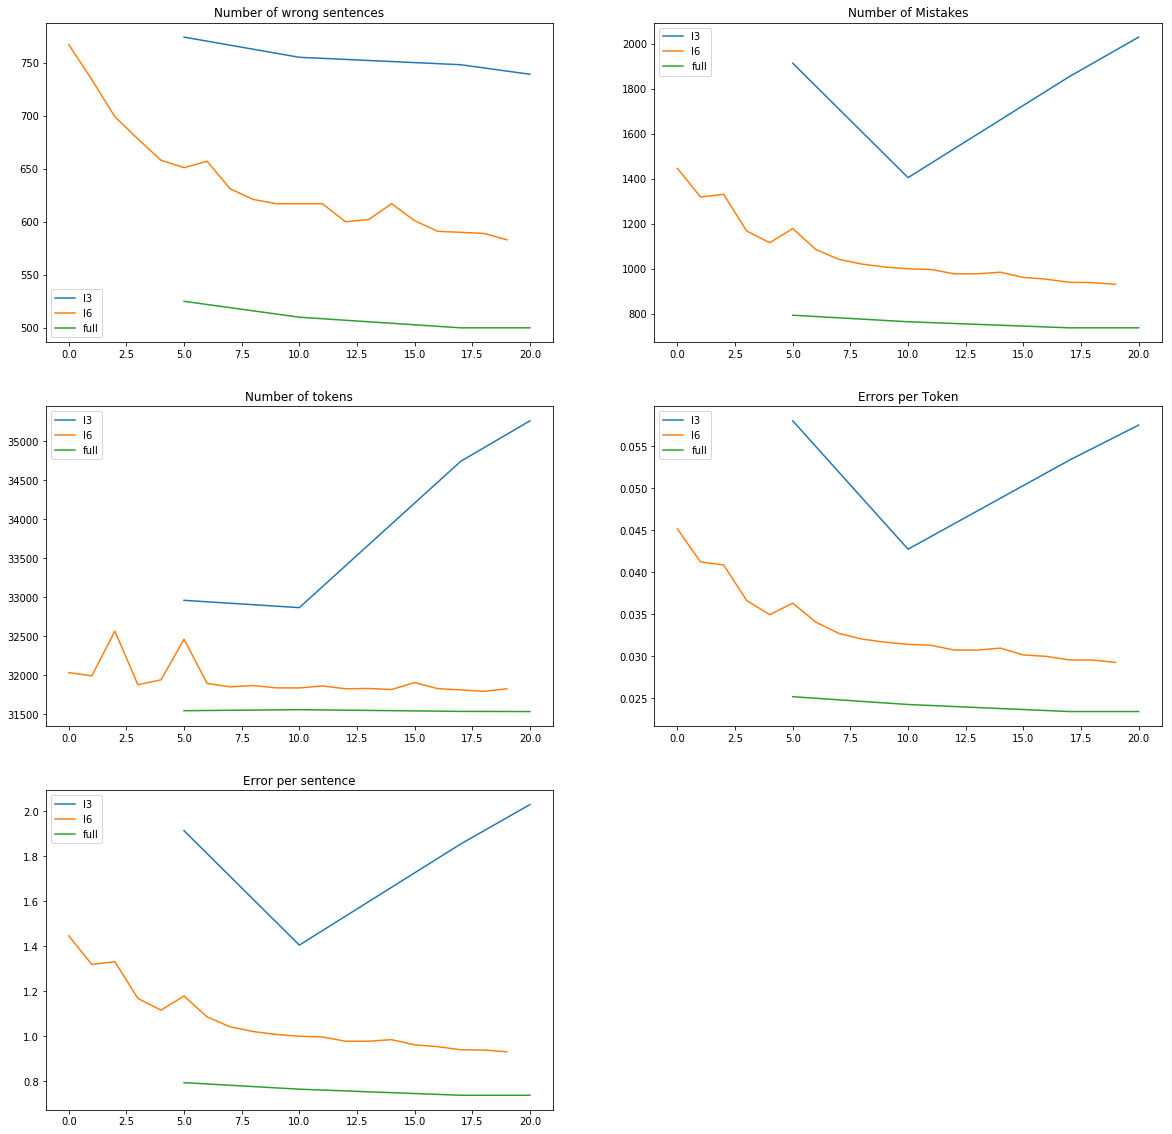

In [8]:
format_reloads_dataset_2(out,0)

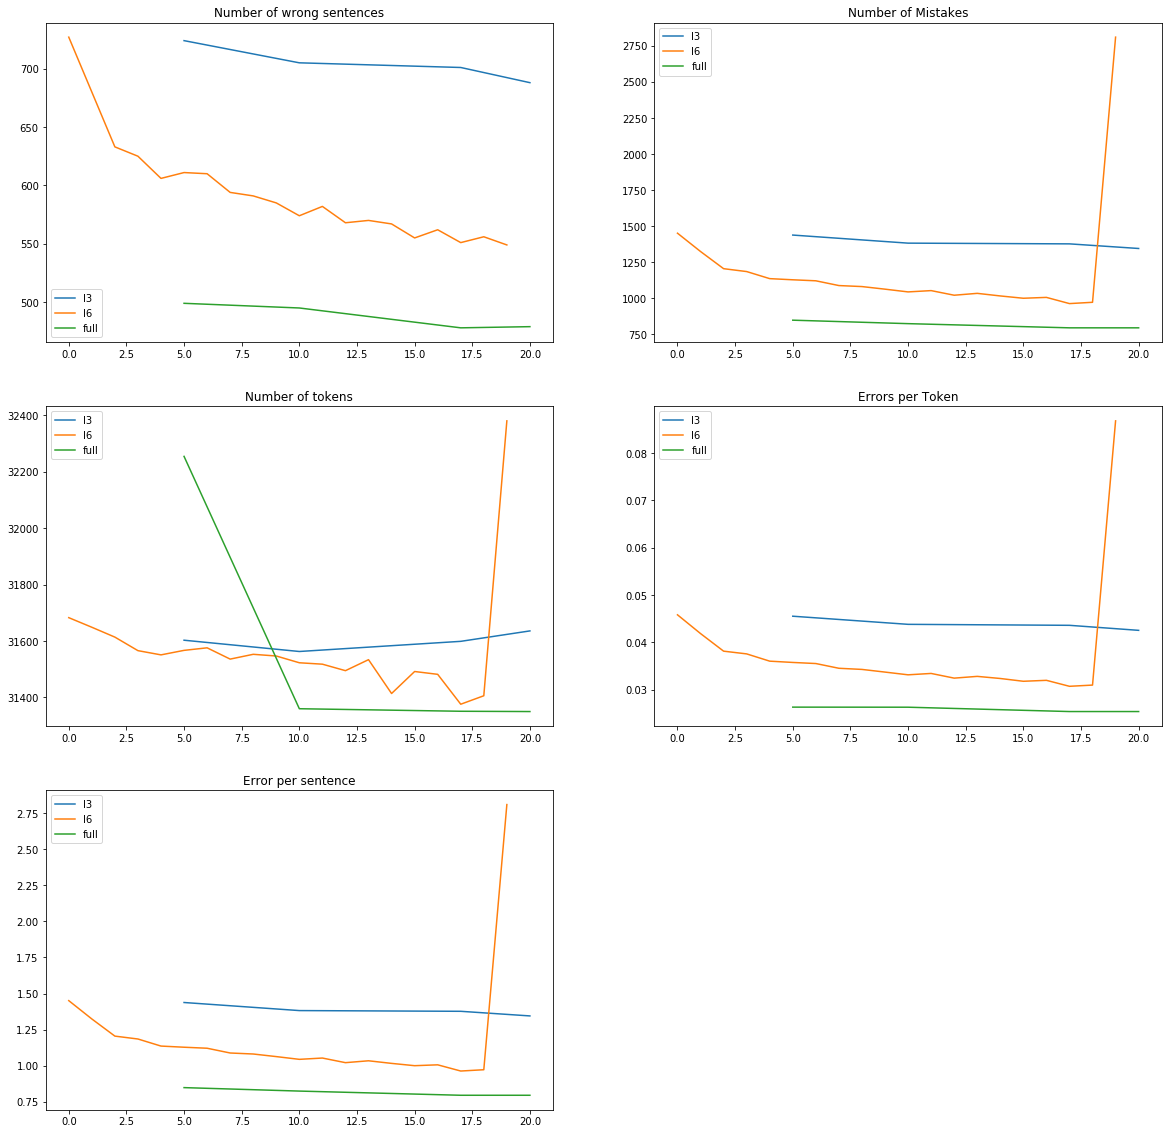

In [9]:
format_reloads_dataset_2(out,1)

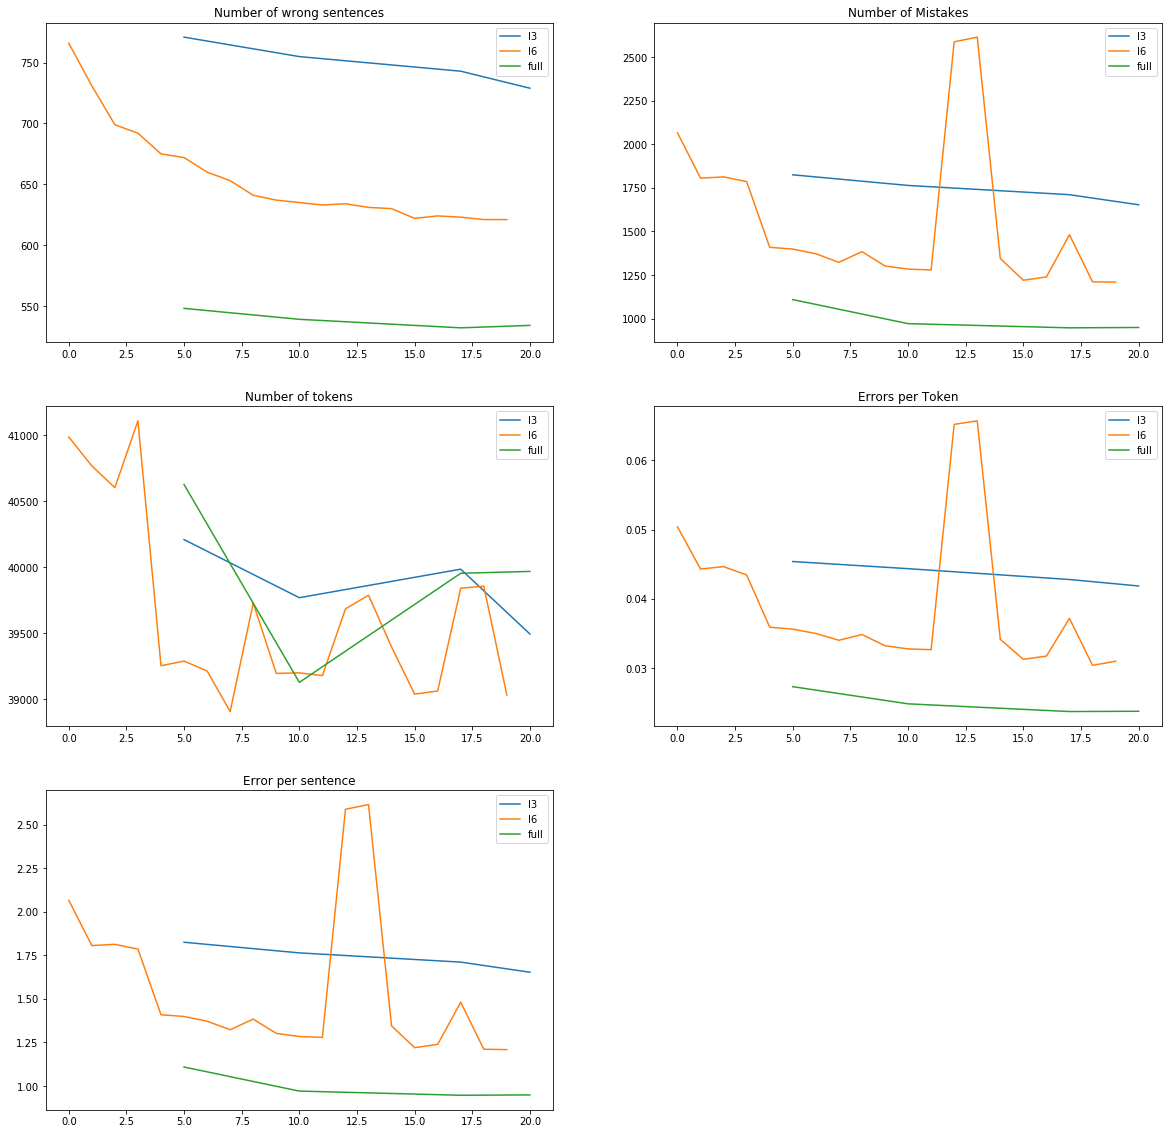

In [10]:
format_reloads_dataset_2(out,2)

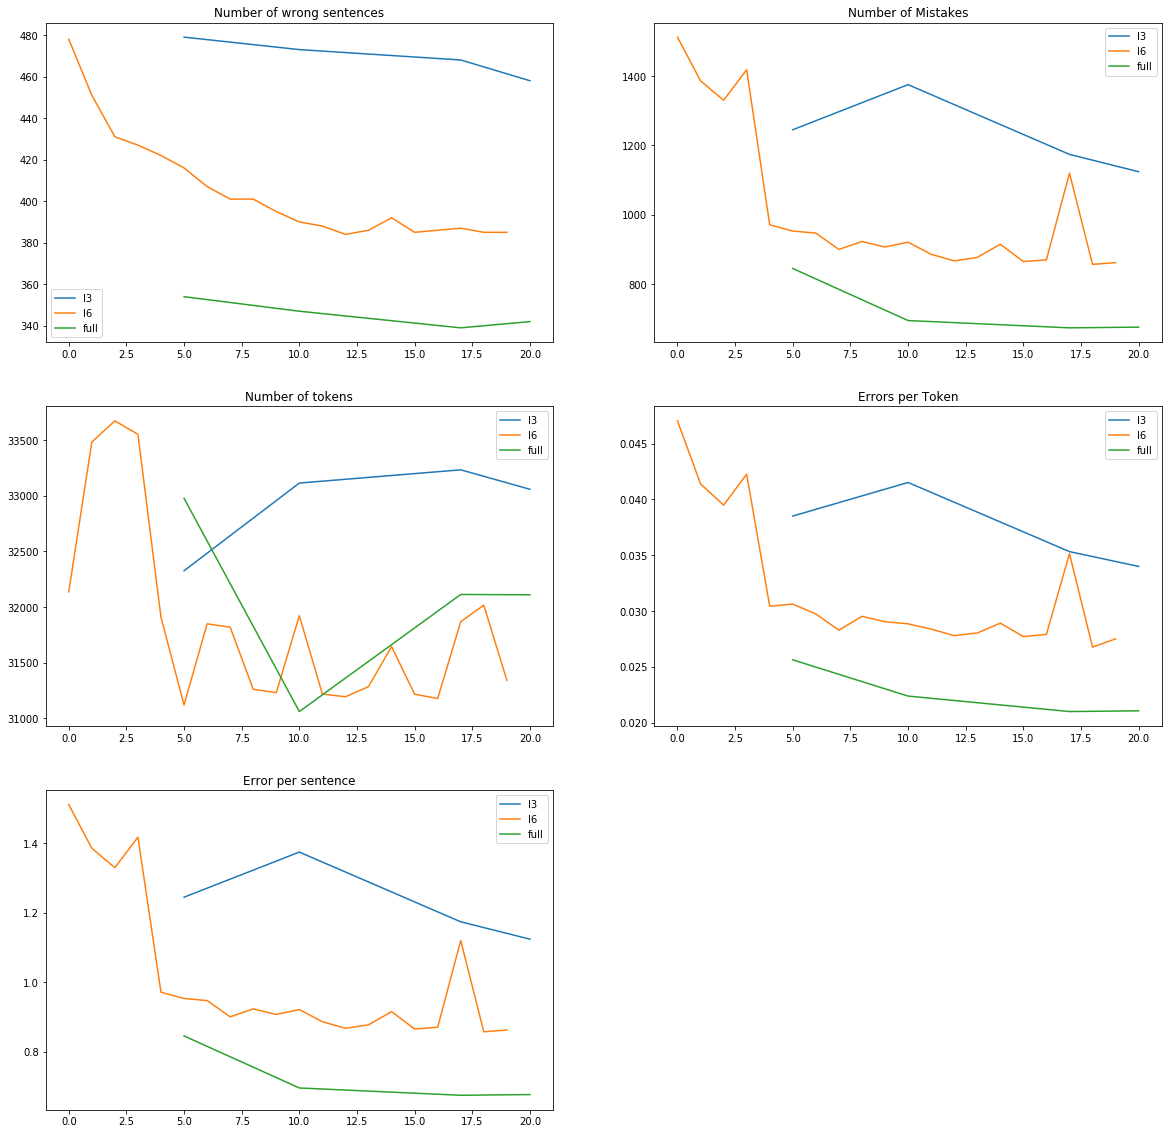

In [11]:
format_reloads_dataset_2(out,3)

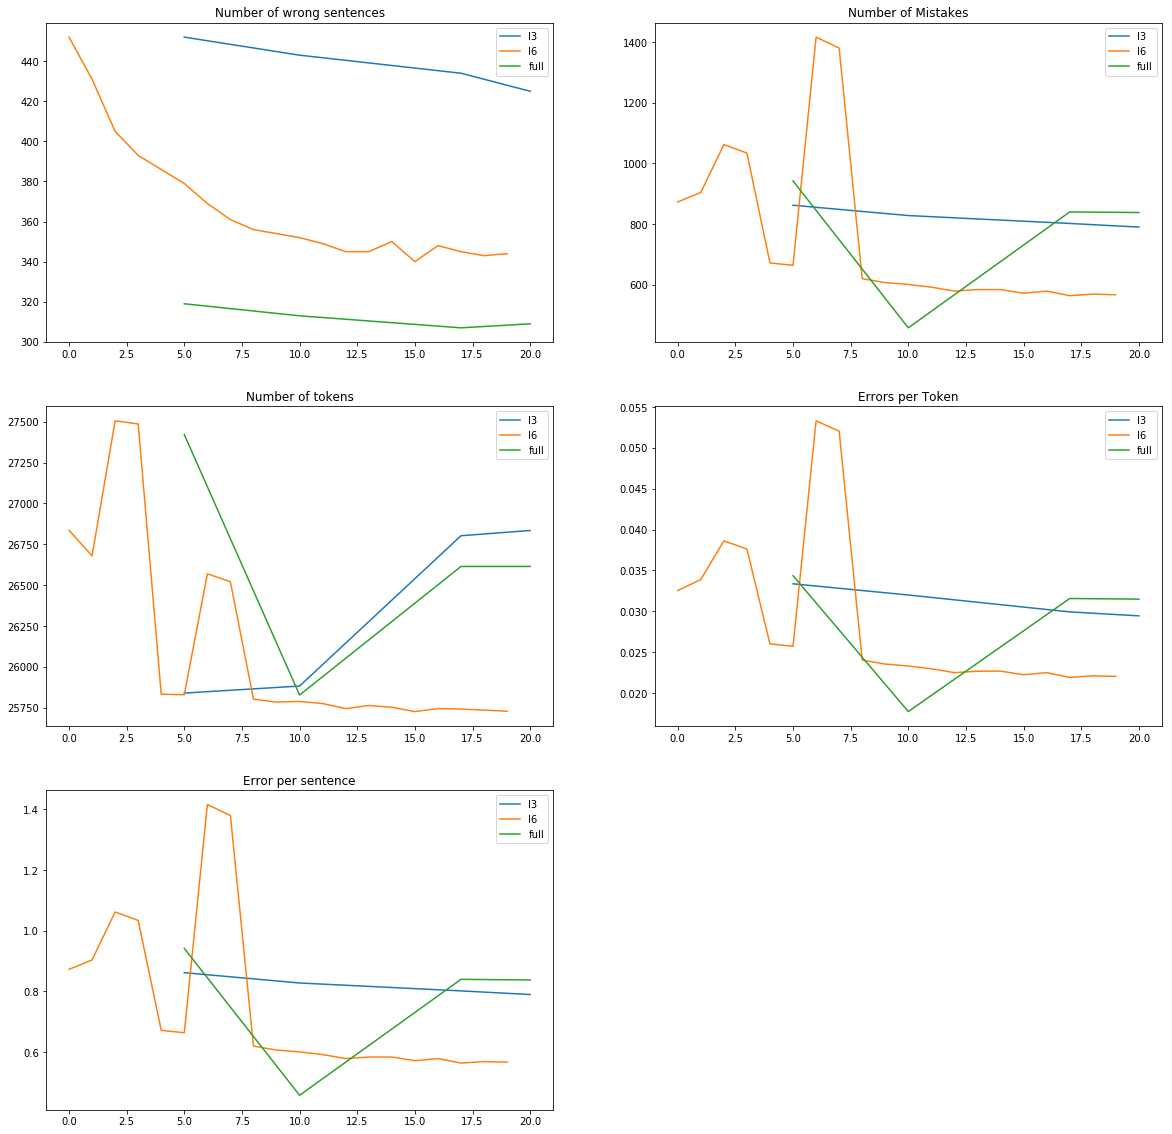

In [12]:
format_reloads_dataset_2(out,4)